In [8]:
from pandas import DataFrame, read_csv, concat, merge

from matplotlib.colors import ListedColormap

from matplotlib import pyplot

from numpy import arange, meshgrid, savetxt, c_, array, transpose

from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

In [9]:
data_types = ['moon','circle','blob']
data_sizes = ['large','small']
data_noises = ['low','high']
algos = ['k_nearest_neighbors','decision_tree','boost','random_forest','linear_svm','rbf_svm','sigmoid_svm']

In [10]:
def plot(datasets):
    figure = pyplot.figure(figsize=(17, 9))
    i = 1
    h = .02
    for X, y in datasets:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = meshgrid(arange(x_min, x_max, h),
                             arange(y_min, y_max, h))
        cm = pyplot.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = pyplot.subplot(len(datasets), 1, i)

        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)

        #ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1

    figure.subplots_adjust(left=.02, right=.98)
    pyplot.show()

In [11]:
results = read_csv('../extracts/all_results.txt')

FileNotFoundError: File b'../extracts/all_results.txt' does not exist

In [6]:
for data_size in data_sizes:
    for data_noise in data_noises:
        for algo in algos:
            figure = pyplot.figure(figsize=(17, 9))
            i=1
            h=.1
            print('%s_%s_%s' % (data_size,data_noise,algo))
            for data_type in data_types:
                data = read_csv('%s,%s,%s_%s.txt' % (data_type,data_size,data_noise,algo))
                X = data[['x1','x2']].as_matrix()
                y = data['y'].as_matrix()
                x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
                y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
                xx, yy = meshgrid(arange(x_min, x_max, h),
                                     arange(y_min, y_max, h))
                cm = pyplot.cm.RdBu
                cm_bright = ListedColormap(['#FF0000', '#0000FF'])
                ax = pyplot.subplot(3, 1, i)
                cm = pyplot.cm.RdBu
                cm_bright = ListedColormap(['#FF0000', '#0000FF'])
                ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)

                ax.set_xlim(xx.min(), xx.max())
                ax.set_ylim(yy.min(), yy.max())
                ax.set_xticks(())
                ax.set_yticks(())
                res = results[results['data'] == data_type][results['algo'] == algo][results['size'] == data_size][results['noise'] == data_noise]
                ax.set_title('%s - error: %.1f%%' % (data_type,float(res['error'].as_matrix())))
                i += 1
            figure.subplots_adjust(left=.02, right=.98)
            pyplot.show()

large_low_k_nearest_neighbors


FileNotFoundError: File b'moon,large,low_k_nearest_neighbors.txt' does not exist

In [7]:
low = results.groupby(['noise','algo']).get_group(('high','boost'))
high = results.groupby(['noise','algo']).get_group(('low','boost'))

low.loc[:,'error_low'] = low.loc[:,'error']
high.loc[:,'error_high'] = high.loc[:,'error']

low = low.drop('error',axis = 1).drop('noise',axis = 1)
high = high.drop('error',axis = 1).drop('noise',axis = 1)

NameError: name 'results' is not defined

In [191]:
for algo in algos:
    low = results.groupby(['noise','algo']).get_group(('low',algo))
    high = results.groupby(['noise','algo']).get_group(('high',algo))

    low.loc[:,'error_low'] = low.loc[:,'error']
    high.loc[:,'error_high'] = high.loc[:,'error']

    low = low.drop('error',axis = 1).drop('noise',axis = 1)
    high = high.drop('error',axis = 1).drop('noise',axis = 1)
    
    result = merge(low, high, on=['size','data','algo'], how='outer')
    summary = summary.append(result)

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [192]:
summary_small = summary[summary['size'] == 'small']
summary_large = summary[summary['size'] == 'large']
summary_small = summary_small.drop('size',axis=1)
summary_large = summary_large.drop('size',axis=1)

/usr/local/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


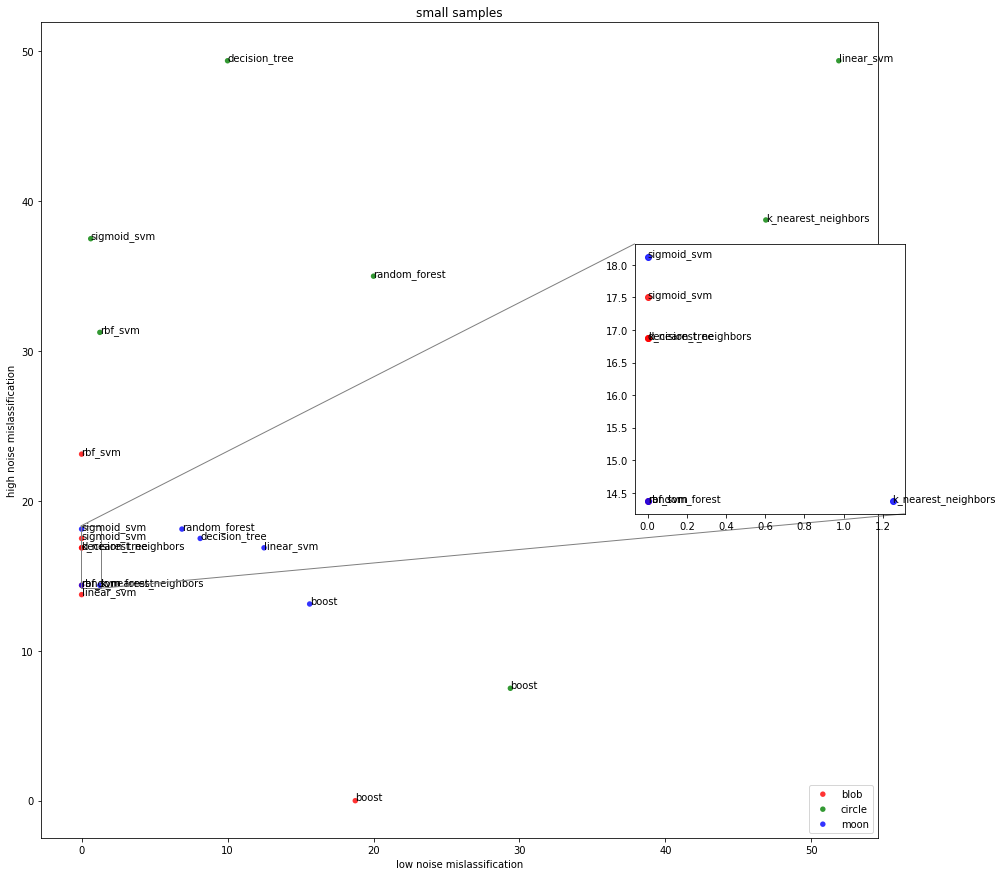

In [244]:
input_data = summary_small
datas = (input_data[input_data['data']=='blob'].drop('data',axis=1)
        , input_data[input_data['data']=='circle'].drop('data',axis=1)
        , input_data[input_data['data']=='moon'].drop('data',axis=1))

colors = ("red", "green", "blue")
groups = ("blob", "circle", "moon") 

fig = pyplot.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, axisbg="1.0")

for data, color, group in zip(datas, colors, groups):
    x, y = transpose(data[['error_low','error_high']].as_matrix())
    for i, txt in enumerate(data['algo'].as_matrix()):
        ax.annotate(txt, (x[i],y[i]))
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
ax.set_title('small samples')
ax2 = pyplot.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.3,0.5,1,1])
ax2.set_axes_locator(ip)

mark_inset(ax, ax2, loc1=2, loc2=4, fc="none", ec='0.5')

for data, color, group in zip(datas, colors, groups):
    x, y = transpose(data[['error_low','error_high']].as_matrix())
    ind = (y > 13.8) & (y <= 20) & (x <= 5)
    for i, txt in enumerate(data['algo'].as_matrix()[ind]):
        ax2.annotate(txt, (x[ind][i],y[ind][i]))
    ax2.scatter(x[ind], y[ind], c=color, alpha=0.8,label=group)
    
ax.set_xlabel('low noise mislassification')
ax.set_ylabel('high noise mislassification')
ax.legend(loc=4)
pyplot.show()